In [113]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [140]:
img = Image.open("./data/logo.jpg")
grayscale = img.convert('L')
# Convert image to grayscale

In [141]:
grayscale_array = np.array(grayscale)
print(grayscale_array.shape)

U, S, VT = np.linalg.svd(grayscale_array, full_matrices = False)
print(U.shape, S.shape, VT.shape, sep = '\n')


(153, 328)
(153, 153)
(153,)
(153, 328)


In [142]:
k = 153 #reconstructing the image with k components 

In [143]:
# reconstruction 
Uk= U[: , :k]
Vk = VT[:k, :] 
Sk = S[:k]

K_reconstruction = Uk @ np.diag(Sk) @ Vk
K_reconstruction = np.clip(K_reconstruction ).astype('uint8')
print(K_reconstruction.shape)
K_reconstructed_image = Image.fromarray ( K_reconstruction )

K_reconstructed_image.save(f"./data/SVD compression/k{k}.png")

print(f"compression ratio : {(grayscale_array.shape[1] * grayscale_array.shape[0] )/( k*( grayscale_array.shape[0] + grayscale_array.shape[1] + 1 )) } ")

(153, 328)
compression ratio : 0.6804979253112033 


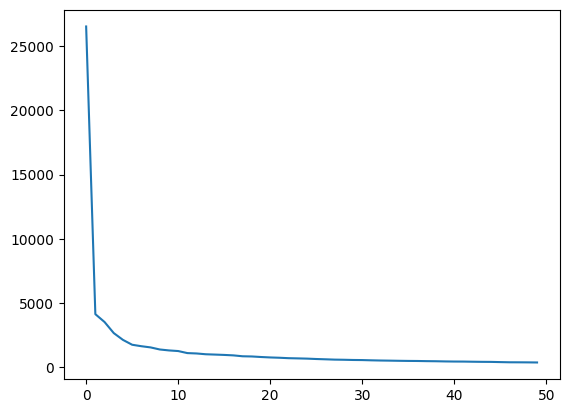

In [128]:
plt.plot(S[:k])